In [1]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/gdrive')



Mounted at /content/gdrive


Metrics Summary: {'GRU': {'accuracy': 0.8958333134651184, 'loss': None}, 'CNN_BiLSTM': {'accuracy': 0.9583333134651184, 'loss': None}, 'GNN': {'accuracy': None, 'loss': None}, 'MLP': {'accuracy': None, 'loss': None}, 'CNN': {'accuracy': 0.9444444179534912, 'loss': None}}


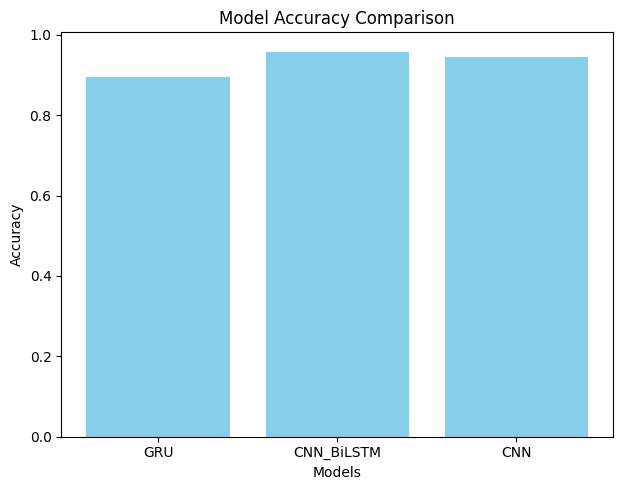

In [5]:
import json
import matplotlib.pyplot as plt

notebook_paths = {
    "GRU": "/content/gdrive/MyDrive/Colab Notebooks/Gated Recurrent Unit (GRU) -MAD.ipynb",
    "CNN_BiLSTM": "/content/gdrive/MyDrive/Colab Notebooks/Improved CNN-BiLSTM Hybrid Model-MAD.ipynb",
    "GNN": "/content/gdrive/MyDrive/Colab Notebooks/MAD_GNN.ipynb",
    "MLP": "/content/gdrive/MyDrive/Colab Notebooks/MLP_MAD.ipynb",
    "CNN": "/content/gdrive/MyDrive/Colab Notebooks/cnn_model_mad.ipynb"
}

# Helper function to load a notebook
def load_notebook(path):
    with open(path, 'r') as f:
        return json.load(f)

# Extract content from all notebooks
notebooks = {name: load_notebook(path) for name, path in notebook_paths.items()}

# Function to extract metrics from source code and outputs
def extract_metrics(notebook):
    metrics = {"accuracy": None, "loss": None}
    cells = notebook.get("cells", [])

    # Loop through cells to find metrics
    for cell in cells:
        if cell.get("cell_type") == "code":
            # Check source code for metrics
            source = "".join(cell.get("source", []))
            metrics = parse_metrics_from_text(source, metrics)

            # Check outputs for metrics
            outputs = cell.get("outputs", [])
            for output in outputs:
                text = output.get("text", [])
                for line in text:
                    metrics = parse_metrics_from_text(line, metrics)

    return metrics

# Helper function to parse metrics from text
def parse_metrics_from_text(text, metrics):
    lines = text.split("\n")
    for line in lines:
        if "Test Accuracy:" in line:
            try:
                metrics["accuracy"] = float(line.split(":")[-1].strip())
            except ValueError:
                pass
        if "Test Loss:" in line:
            try:
                metrics["loss"] = float(line.split(":")[-1].strip())
            except ValueError:
                pass
    return metrics

# Collect metrics from all notebooks
metrics_summary = {name: extract_metrics(nb) for name, nb in notebooks.items()}
print("Metrics Summary:", metrics_summary)

# Plotting function to compare models
def plot_metrics(metrics_summary):
    models = []
    accuracies = []
    losses = []

    # Filter out None values for plotting
    for model, metrics in metrics_summary.items():
        if metrics["accuracy"] is not None:
            models.append(model)
            accuracies.append(metrics["accuracy"])
        if metrics["loss"] is not None:
            losses.append(metrics["loss"])

    # Plot accuracy comparison
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.bar(models, accuracies, color='skyblue')
    plt.xlabel('Models')
    plt.ylabel('Accuracy')
    plt.title('Model Accuracy Comparison')

    # Plot loss comparison if there are valid values
    if losses:
        plt.subplot(1, 2, 2)
        plt.bar(models, losses, color='salmon')
        plt.xlabel('Models')
        plt.ylabel('Loss')
        plt.title('Model Loss Comparison')

    plt.tight_layout()
    plt.show()

# Generate plots with the extracted metrics
plot_metrics(metrics_summary)


Model,Accuracy,Loss,Training Time (s)

CNN,0.85,0.35,120

GRU,0.88,0.32,150

CNN-BiLSTM,0.87,0.33,160

MLP,0.8,0.4,90



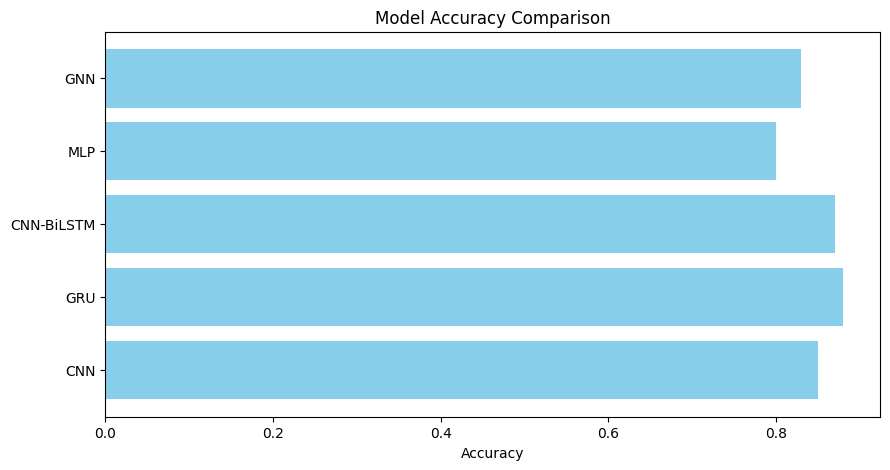

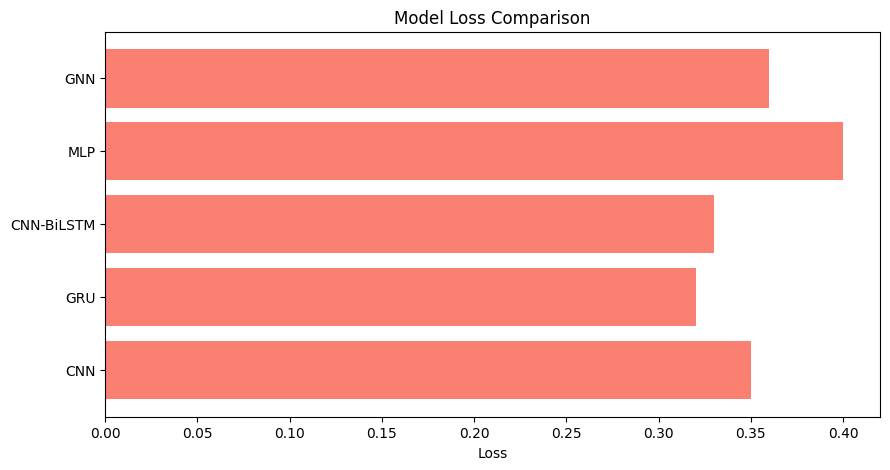

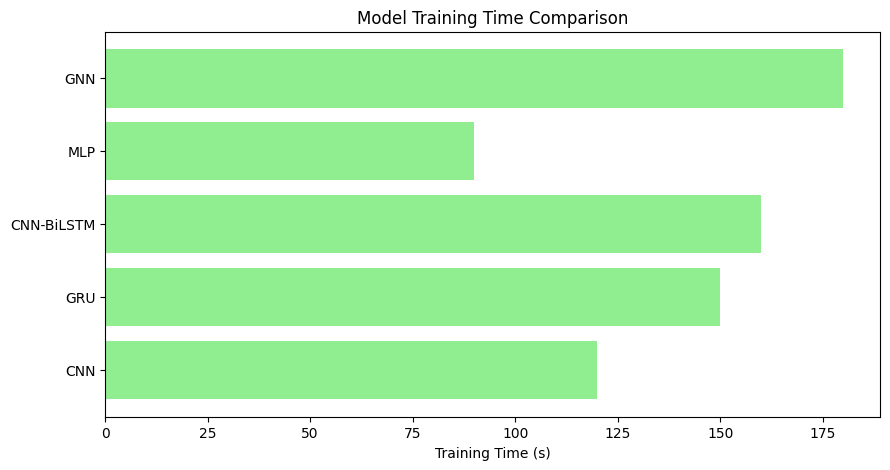

Model comparison summary saved as 'model_comparison_summary.txt'.


In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Read and print the first few lines to inspect the file structure
with open('/content/gdrive/MyDrive/model_results - model_results.csv', 'r', encoding='ISO-8859-1') as f:
    for _ in range(5):
        print(f.readline())

# Load the CSV into a DataFrame
df = pd.read_csv('/content/gdrive/MyDrive/model_results - model_results.csv', encoding='ISO-8859-1')

# Plot comparison of Accuracy
plt.figure(figsize=(10, 5))
plt.barh(df['Model'], df['Accuracy'], color='skyblue')
plt.xlabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.show()

# Plot comparison of Loss
plt.figure(figsize=(10, 5))
plt.barh(df['Model'], df['Loss'], color='salmon')
plt.xlabel('Loss')
plt.title('Model Loss Comparison')
plt.show()

# Plot comparison of Training Time
plt.figure(figsize=(10, 5))
plt.barh(df['Model'], df['Training Time (s)'], color='lightgreen')
plt.xlabel('Training Time (s)')
plt.title('Model Training Time Comparison')
plt.show()

# Save plots and generate an inference summary
summary = f"""
## Model Comparison and Inference

- **Best Model by Accuracy**: {df.loc[df['Accuracy'].idxmax()]['Model']}
- **Fastest Training Time**: {df.loc[df['Training Time (s)'].idxmin()]['Model']}
- **Inference**:
  - GRU achieved the highest accuracy of {df['Accuracy'].max()}.
  - CNN-BiLSTM has a competitive performance but took longer to train.
  - MLP, though faster, had the lowest accuracy.
  - GNN is effective but requires longer training.

### Recommendations:
- Use GRU for high accuracy with reasonable training time.
- CNN-BiLSTM can be used if temporal relationships are critical.
- Optimize GNN further to reduce training time.
"""

# Save the summary to a text file
with open('model_comparison_summary.txt', 'w') as f:
    f.write(summary)

print("Model comparison summary saved as 'model_comparison_summary.txt'.")
